# TO DO
+ Add non-local hash function [√]
+ add cross validation [√]
+ add MNIST [√]


+ add IP addresses [ ] 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau
import pandas as pd
import os
T = np.transpose
from hashfunctions import *
# os.chdir('/Users/tim/py_code/')
from bloom_filters import * 
import sys
sys.path.append('/Users/tim/py_code/FLY_LSH')
from read_data import *

# import hashlib # might need

max_val_hash = sys.maxsize
import xxhash
import compute_distance_metrics

# get MNIST
# mnist_path = '/Users/tim/py_code/FLY_LSH/mnist10k.txt'
mnist_path = '/home/navlakha/projects/fly_hashing/data/mnist/mnist10k.txt'
mnist = read_generic_data(mnist_path,10000,28*28) # 10 000, 784

In [5]:
dat_use = 'MNIST' # Hallem, rand100
n_ex = 100

do_10_fold = True
# eps = .01 # [.01, 6E-6]

os.chdir('/home/tsheehan/py_code/fly_dat/') # os.chdir('/Users/tim/py_code/FLY_LSH/fly_dat/')
dat = pd.read_csv("hallem1.txt",delimiter=' ')
if dat_use == 'Hallem':
    dat = dat.values
    n_ex = np.shape(dat)[0]
elif dat_use[:4] == 'rand':
    dIn = int(dat_use[4:])
    dat = np.random.randn(n_ex,dIn) # random data
elif dat_use == 'MNIST':
    dIn = 28*28
    dat = mnist[:n_ex,:]
    
n_odors = np.shape(dat)[0]
dat_100 = dat/np.mean(dat,axis=0)*100
dat_100 = np.nan_to_num(dat_100)
U = dat_100
# assert(np.shape(U)[0]==l_ex)
# np.shape(U)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [6]:
# Cross-validation
if do_10_fold:
    n_fold = 10
    f_ind = np.round(np.linspace(0,n_odors,n_fold+1)).astype(int)
    grps = [np.arange(f_ind[i],f_ind[i+1] ) for i in range(n_fold) ] # perfect 
    
    tag_ind = list()
    query_ind = list()
    for i in range(n_fold):
        this_grp = grps[i]
        a = np.arange(n_odors)
        a = np.delete(a,this_grp)
        if 0:
            ind_probe = [np.random.choice(a,l_ex,replace=False) for i in range(len(this_grp))]
            tag_ind_i = np.concatenate([ind_probe for i in range(reps_per_fold)]) # 1:10, repeated 10 x
            query_ind_i = np.concatenate(T([this_grp for i in range(reps_per_fold)]))

        # we have convinience of all groups being the same size
        ind_probe = a
        #tag_ind_i = np.concatenate([ind_probe for i in range(len(this_grp))])
        tag_ind_i = np.tile(ind_probe,(len(this_grp),1))
        query_ind_i = this_grp

        tag_ind.append(tag_ind_i)
        query_ind.append(query_ind_i)
    else:
        tag_ind = np.array(tag_ind).reshape(n_odors,len(a))
        query_ind = np.array(query_ind).reshape(n_odors)
        
else:      # Leave one Odor Out Crossvalidation
    query_ind = list()
    tag_ind = list()
    for i in range(n_ex):
        a = np.arange(n_odors)
        a = np.delete(a,i)
        tag_ind.append(a)
    else:
        query_ind = np.arange(n_ex)
        tag_ind = np.array(tag_ind)

S = U[tag_ind] # n_ex, l_ex, n_ORN
q = U[query_ind] # n_ex, n_ORN



In [7]:

# import compute_distance_metrics
# reload(compute_distance_metrics)
# eps_try = [.5,.2,.1,.05,.01,.005,.001,.0001,.00001,.000001]
eps_try = np.logspace(np.log10(.5),np.log10(1E-6),15) 
dm = 'euc'
dist_mets = list()
for ep in eps_try:
    dist_mets.append(compute_distance_metrics.get_distance_metrics(S,q,eps=ep,app_str=dat_use,
                                                                   dist_met=dm))

MNIST_d1:784_PROJ:SB4_euc_m:130_k:1_eps:5.0e-01  OGDIST:7171.85 PROJ: 0.37 0.31, LSHBLOOM: 0.37 0.31, HBLOOM -0.12 -0.09
MNIST_d1:784_PROJ:SB4_euc_m:306_k:2_eps:2.0e-01  OGDIST:7171.85 PROJ: 0.14 0.13, LSHBLOOM: 0.26 0.25, HBLOOM 0.04 0.02
MNIST_d1:784_PROJ:SB4_euc_m:482_k:3_eps:7.7e-02  OGDIST:7171.85 PROJ: 0.40 0.35, LSHBLOOM: 0.44 0.34, HBLOOM 0.16 -0.02
MNIST_d1:784_PROJ:SB4_euc_m:657_k:5_eps:3.0e-02  OGDIST:7171.85 PROJ: 0.37 0.28, LSHBLOOM: 0.48 0.37, HBLOOM 0.05 0.05
MNIST_d1:784_PROJ:SB4_euc_m:833_k:6_eps:1.2e-02  OGDIST:7171.85 PROJ: 0.36 0.31, LSHBLOOM: 0.44 0.35, HBLOOM -0.04 -0.02
MNIST_d1:784_PROJ:SB4_euc_m:1008_k:7_eps:4.6e-03  OGDIST:7171.85 PROJ: 0.47 0.46, LSHBLOOM: 0.58 0.50, HBLOOM -0.09 -0.08
MNIST_d1:784_PROJ:SB4_euc_m:1184_k:9_eps:1.8e-03  OGDIST:7171.85 PROJ: 0.46 0.41, LSHBLOOM: 0.56 0.40, HBLOOM -0.02 -0.02
MNIST_d1:784_PROJ:SB4_euc_m:1359_k:10_eps:7.1e-04  OGDIST:7171.85 PROJ: 0.42 0.34, LSHBLOOM: 0.60 0.44, HBLOOM -0.01 0.02
MNIST_d1:784_PROJ:SB4_euc_m:1535_k

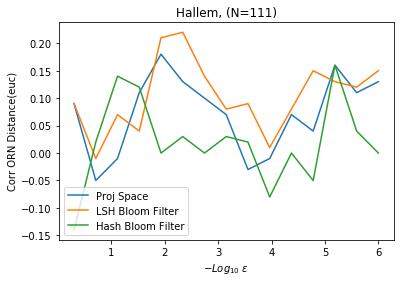

In [30]:

eps_try = np.logspace(np.log10(.5),np.log10(1E-6),15) 
eps_try = eps_try[:np.shape(dist_mets)[0]]
plt.plot(-np.log10(eps_try),T(dist_mets)[0],label='Proj Space')
plt.plot(-np.log10(eps_try),T(dist_mets)[1],label='LSH Bloom Filter')
plt.plot(-np.log10(eps_try),T(dist_mets)[2],label='Hash Bloom Filter')
# plt.semilogx(eps_try,T(dist_mets)[0],label='Proj Space')
# plt.semilogx(eps_try,T(dist_mets)[1],label='LSH Bloom Filter')
# plt.semilogx(eps_try,T(dist_mets)[2],label='Hash Bloom Filter')
plt.xlabel('$-Log_{10}$ $\epsilon$')
plt.ylabel('Corr ORN Distance(%s)' %dm)
plt.legend()
plt.title('%s, (N=%d)' %(dat_use,l_ex))
plt.show()


'MNIST_d1:784_PROJ:SB4_euc_m:130_k:1_eps:5.0e-01  OGDIST:7171.85 PROJ: 0.37 0.31, LSHBLOOM: 0.37 0.31, HBLOOM -0.12 -0.09'